In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import utils

In [ ]:
fully_connected_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=784, out_features=285),
    nn.Linear(in_features=285, out_features=135),
    nn.Linear(in_features=135, out_features=60),
    nn.Linear(in_features=60, out_features=10),
)
print("Fully connected model:", utils.compute_number_of_parameters(fully_connected_model), "parameters\n", fully_connected_model)
fcn_tracks = utils.train(model=fully_connected_model,
    optimizer=torch.optim.SGD(lr=0.01, params=fully_connected_model.parameters()),
    criterion=nn.CrossEntropyLoss(),
    data=utils.MnistData(),
    epochs=200,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

Fully connected model: 271105 parameters
 Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=285, bias=True)
  (2): Linear(in_features=285, out_features=135, bias=True)
  (3): Linear(in_features=135, out_features=60, bias=True)
  (4): Linear(in_features=60, out_features=10, bias=True)
)
Training on cuda
Epoch [1/200] loss: 1.65279, acc: 0.50987, eval_loss: 1.04587, eval_acc: 0.64310
Epoch [2/200] loss: 0.86979, acc: 0.68885, eval_loss: 0.77009, eval_acc: 0.71170
Epoch [3/200] loss: 0.69900, acc: 0.74727, eval_loss: 0.67213, eval_acc: 0.75260
Epoch [4/200] loss: 0.62608, acc: 0.77427, eval_loss: 0.62175, eval_acc: 0.77350
Epoch [5/200] loss: 0.58043, acc: 0.79428, eval_loss: 0.58598, eval_acc: 0.79020
Epoch [6/200] loss: 0.54638, acc: 0.80893, eval_loss: 0.56103, eval_acc: 0.80090
Epoch [7/200] loss: 0.52258, acc: 0.81745, eval_loss: 0.53921, eval_acc: 0.80770
Epoch [8/200] loss: 0.50369, acc: 0.82372, eval_loss: 0.52235, eval_acc: 0.81200
Ep

In [ ]:
conv1d_model = nn.Sequential(
    nn.Flatten(start_dim=2),
    nn.Conv1d(in_channels=1, out_channels=15, kernel_size=3, stride=2, padding=0),
    nn.Conv1d(in_channels=15, out_channels=15, kernel_size=3, stride=2, padding=0),
    nn.Conv1d(in_channels=15, out_channels=15, kernel_size=3, stride=2, padding=0),
    nn.Flatten(),
    nn.Linear(in_features=1455, out_features=10),
)
print("1D convolutionnal model:", utils.compute_number_of_parameters(conv1d_model), "parameters\n", conv1d_model)
cnn_tracks = utils.train(model=conv1d_model,
    optimizer=torch.optim.SGD(lr=0.01, params=conv1d_model.parameters()),
    criterion=nn.CrossEntropyLoss(),
    data=utils.MnistData(),
    epochs=200,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

1D convolutionnal model: 16000 parameters
 Sequential(
  (0): Flatten(start_dim=2, end_dim=-1)
  (1): Conv1d(1, 15, kernel_size=(3,), stride=(2,))
  (2): Conv1d(15, 15, kernel_size=(3,), stride=(2,))
  (3): Conv1d(15, 15, kernel_size=(3,), stride=(2,))
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1455, out_features=10, bias=True)
)
Training on cuda
Epoch [1/200] loss: 1.14580, acc: 0.65343, eval_loss: 0.66655, eval_acc: 0.76610
Epoch [2/200] loss: 0.60245, acc: 0.78623, eval_loss: 0.62122, eval_acc: 0.77790
Epoch [3/200] loss: 0.53989, acc: 0.80978, eval_loss: 0.54747, eval_acc: 0.80430
Epoch [4/200] loss: 0.51254, acc: 0.81952, eval_loss: 0.53284, eval_acc: 0.80780
Epoch [5/200] loss: 0.49314, acc: 0.82672, eval_loss: 0.51115, eval_acc: 0.81650
Epoch [6/200] loss: 0.48232, acc: 0.83017, eval_loss: 0.51474, eval_acc: 0.81720
Epoch [7/200] loss: 0.47358, acc: 0.83243, eval_loss: 0.49830, eval_acc: 0.82030
Epoch [8/200] loss: 0.46381, acc: 0.83702, eval_loss: 0.51010

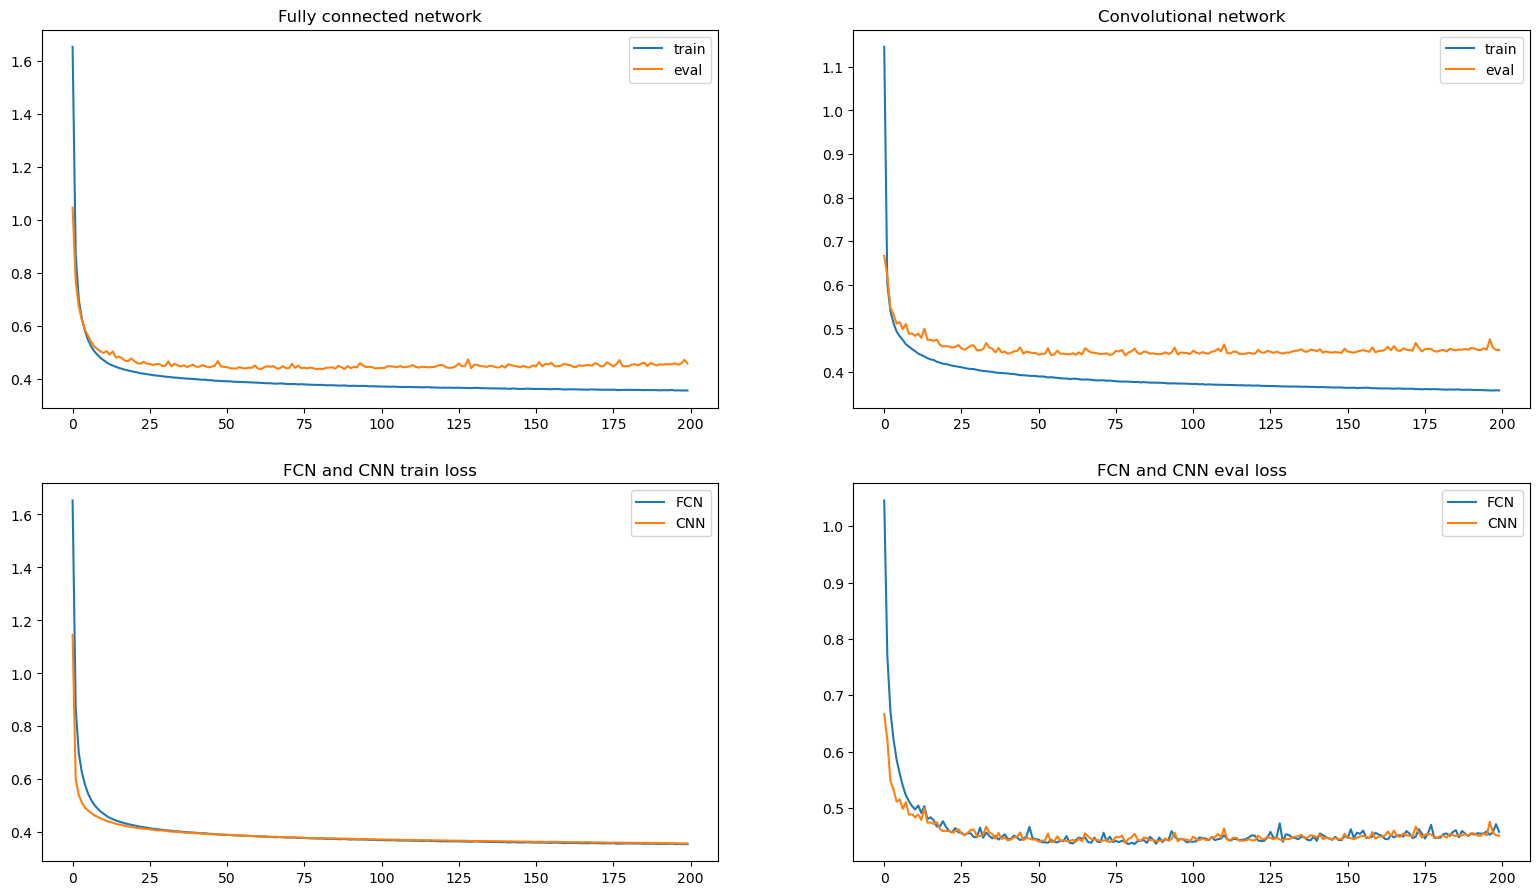

In [7]:
fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
axes[0].set_title("Fully connected network")
axes[1].set_title("Convolutional network")
axes[2].set_title("FCN and CNN train loss")
axes[3].set_title("FCN and CNN eval loss")
for l,n in zip(fcn_tracks[:2], ["train", "eval"]): axes[0].plot(l, label=n)
for l,n in zip(cnn_tracks[:2], ["train", "eval"]): axes[1].plot(l, label=n)
axes[2].plot(fcn_tracks[0], label="FCN")
axes[2].plot(cnn_tracks[0], label="CNN")
axes[3].plot(fcn_tracks[1], label="FCN")
axes[3].plot(cnn_tracks[1], label="CNN")
for ax in axes: ax.legend()
plt.show()

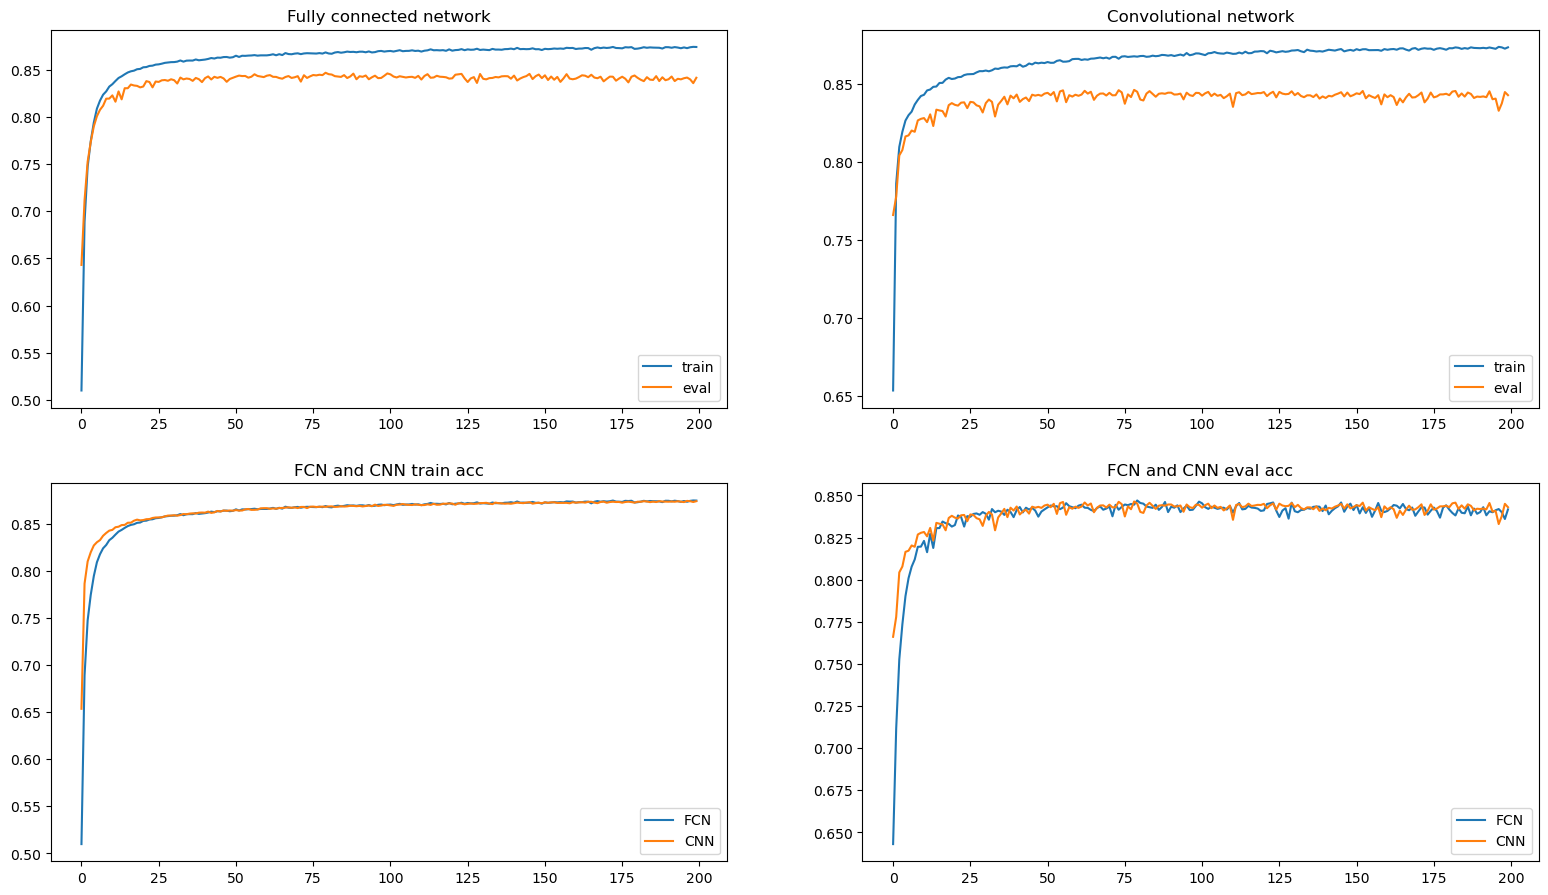

In [8]:
fig, axes = plt.subplots(2,2, figsize=(19.2,10.8))
axes = axes.ravel()
axes[0].set_title("Fully connected network")
axes[1].set_title("Convolutional network")
axes[2].set_title("FCN and CNN train acc")
axes[3].set_title("FCN and CNN eval acc")
for l,n in zip(fcn_tracks[2:], ["train", "eval"]): axes[0].plot(l, label=n)
for l,n in zip(cnn_tracks[2:], ["train", "eval"]): axes[1].plot(l, label=n)
axes[2].plot(fcn_tracks[2], label="FCN")
axes[2].plot(cnn_tracks[2], label="CNN")
axes[3].plot(fcn_tracks[3], label="FCN")
axes[3].plot(cnn_tracks[3], label="CNN")
for ax in axes: ax.legend()
plt.show()